# Clustering | K-means

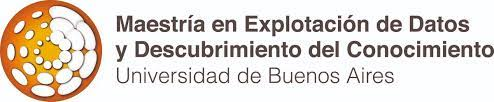

Datamining en ciencia y tecnología  
2do cuatrimestre 2023

In [3]:
try:
    np.abs(1)
    firstrun = False
except:
    firstrun= True
firstrun

True

In [4]:
if (firstrun):
  import numpy as np

  import matplotlib.pyplot as plt
  from matplotlib import style
  style.use('ggplot')

  from sklearn import datasets
  from sklearn.decomposition import PCA

  pca = PCA(n_components=2)

([], [])

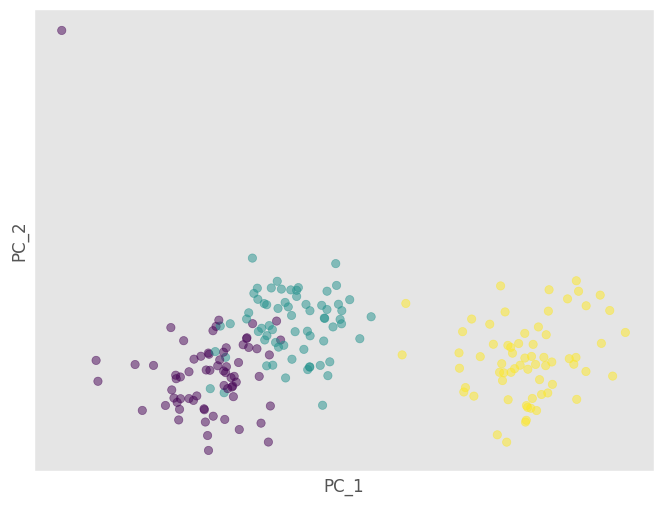

In [6]:
## Cargo datos de IRIS
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Agrego outliers
#X = np.vstack([np.max(X,axis=0)*2, X])
#y = np.hstack([0, y])

## Cargo datos de WINE
#wine = datasets.load_wine()
#X = wine.data
#y = wine.target

## Genero datos
X, y = datasets.make_blobs(n_samples=200, n_features=4, centers=3, center_box= (-10.0, 10.0), cluster_std=3.0, shuffle=True, random_state=13)

# Agrego outliers
X = np.vstack([np.max(X,axis=0)*1.5, X])
y = np.hstack([0, y])


# Proyecto los datos sobre PC_1 y PC_2 para graficar
pca.fit(X)
x_pca = pca.transform(X)

# Grafico los datos con las etiquetas originales
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, alpha = 0.5, edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [7]:
y

array([0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0,
       1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2,
       2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 0])

## k-means desde cero, sin usar SciKit Learn como para entender que hace

### Primero, algunas funciones útiles

In [8]:
# Esta función calcula la distacia euclidea entre dos elementos.
# Como vimos en la clase, puede cambiarse junto a la función
# objetivo.
def distancia_euclidea(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [9]:
# Esta función calcula los centroides, lo hace con el promedio acorde al uso de
# la distancia euclidea (y es común para muchas distancias), pero podría tener
# otra definición si usasemos por ejemplo la distancia Manhattan.
def calcular_centroides(X,etiquetas,k):
  centroides = []
  for j in range(0,k):
    # [e==i for e in etiquetas]
    ind = [i for i, e in enumerate(etiquetas) if e==j]
    centroides.append(np.mean(X[ind,:], axis=0))
  return centroides

In [10]:
# Asigna los elementos a los clusters de acuerdo a la noción de distancia que
# definimos más arriba
def asignar_clusters(X,centroides):
  etiquetas = []
  for i in range(0,len(X)):
    distancias = []
    for CC in centroides:
      distancias.append(distancia_euclidea(X[i,:], CC) )
    etiquetas.append(np.argmin(distancias) )
  return etiquetas

In [11]:
# Suma las distancias al centroide dentro de cada cluster (errores cuadráticos),
# y después suma entre clusters
def calcula_sse(X,centroides,etiquetas,k):
  se = []
  for j in range(0,k):
    # [e==i for e in etiquetas]
    ind = [i for i, e in enumerate(etiquetas) if e==j]
    Y = X[ind,:]
    se.append( sum( [distancia_euclidea(y,centroides[j])**2 for y in Y] ) )
    # C = np.mean(Y, axis=0)
    # se.append( sum( [distancia_euclidea(y,C) for y in Y] ) )
  return sum(se)

In [12]:
# Elijo el valor de k, en este caso se que el mejor es 3, pero podría probar
# otros.
k = 3

([], [])

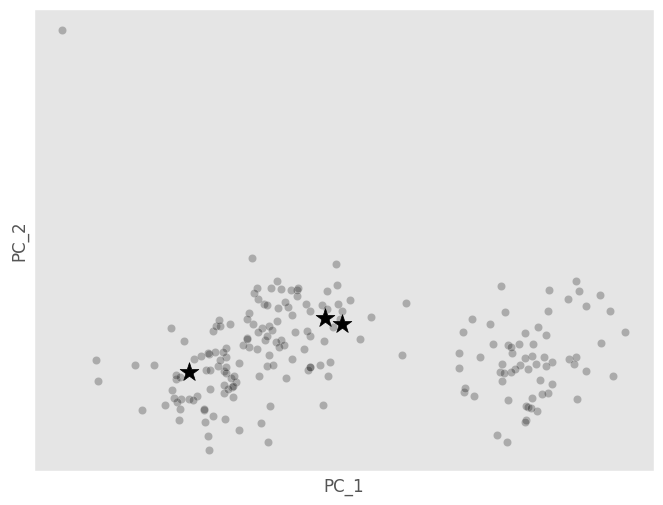

In [13]:
# Inicialización: Elegir k puntos al azar, por ejemplo entre lo ejemplares del dataset

#Condiciones iniciales aleatoreas
#np.random.seed(0)
idx = np.random.choice(len(X),size=k,replace=False)
centroides = X[idx,:]

#Malas condiciones iniciales
#idx = [0,1,2]
#centroides = X[idx,:]

centroides_pca = pca.transform(centroides)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            color='k', alpha=.25, edgecolor='w')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [14]:
etiquetas = asignar_clusters(X,centroides)
np.unique(etiquetas)

array([0, 1, 2])

([], [])

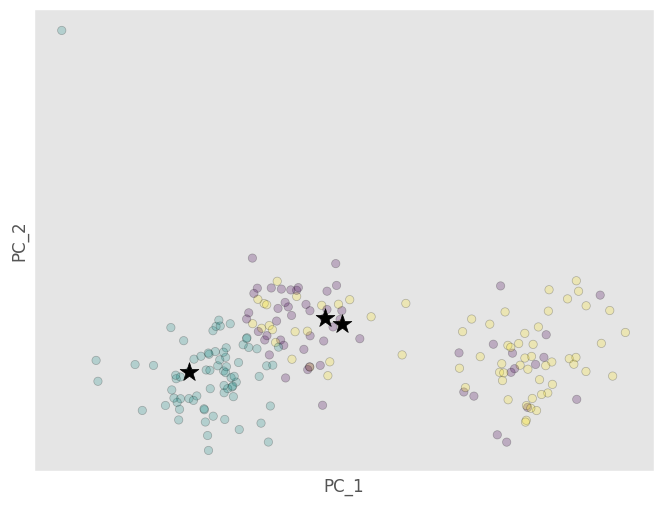

In [15]:
plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=etiquetas, alpha=.25, edgecolor='k')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [16]:
centroides = calcular_centroides(X,etiquetas,k)
centroides_pca = pca.transform(centroides)

([], [])

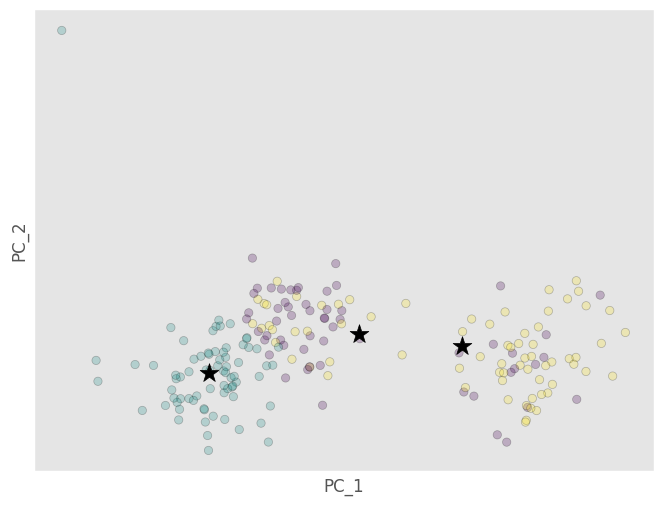

In [17]:
plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=etiquetas, alpha=.25, edgecolor='k')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

-----------------------------------
39.37739846685347
40
7834.8607333307655
-----------------------------------
1.5895144731699316
13
7480.895332919714
-----------------------------------
0.15779522365780158
4
7433.174904886444
-----------------------------------
0.038347812416007994
2
7424.713312016926
-----------------------------------
0.014623837147163372
1
7423.451834559848
-----------------------------------
0.03439262419688216
1
7419.4995332909875
-----------------------------------
0.0
0
7419.4995332909875
-----------------------------------
0.0
0
7419.4995332909875
-----------------------------------
0.0
0
7419.4995332909875
-----------------------------------
0.0
0
7419.4995332909875


([], [])

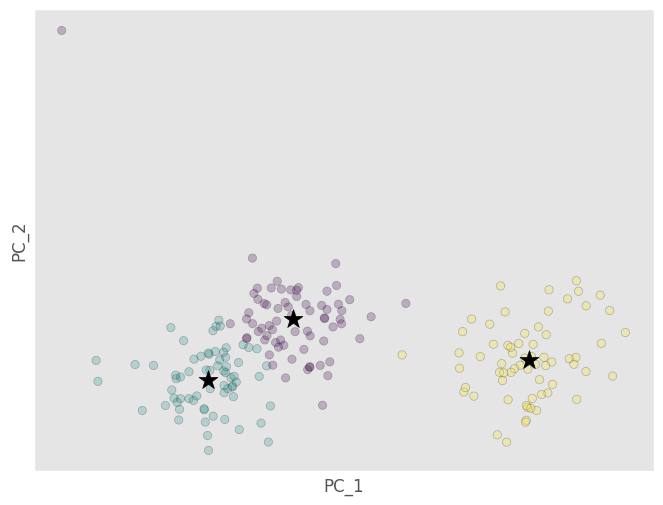

In [20]:
n_iter_max = 10
sse = []
for n in range(0,n_iter_max):
  centroides_old = centroides
  etiquetas_old = etiquetas
  etiquetas = asignar_clusters(X,centroides)
  centroides = calcular_centroides(X,etiquetas,k)

  print('-----------------------------------')
  print( np.sum(  np.sum( ( np.array(centroides)-np.array(centroides_old) )**2, axis=1 ) ) )
  print( sum( [new!=old for new, old in zip(etiquetas, etiquetas_old)] ) )
  print( calcula_sse(X,centroides,etiquetas,k) )
  sse.append(calcula_sse(X,centroides,etiquetas,k))
  # Criterio de parada

centroides_pca = pca.transform(centroides)
plt.figure(1,figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=etiquetas, alpha=.25, edgecolor='k')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [21]:
sse

[7834.8607333307655,
 7480.895332919714,
 7433.174904886444,
 7424.713312016926,
 7423.451834559848,
 7419.4995332909875,
 7419.4995332909875,
 7419.4995332909875,
 7419.4995332909875,
 7419.4995332909875]

Text(0, 0.5, 'SSE')

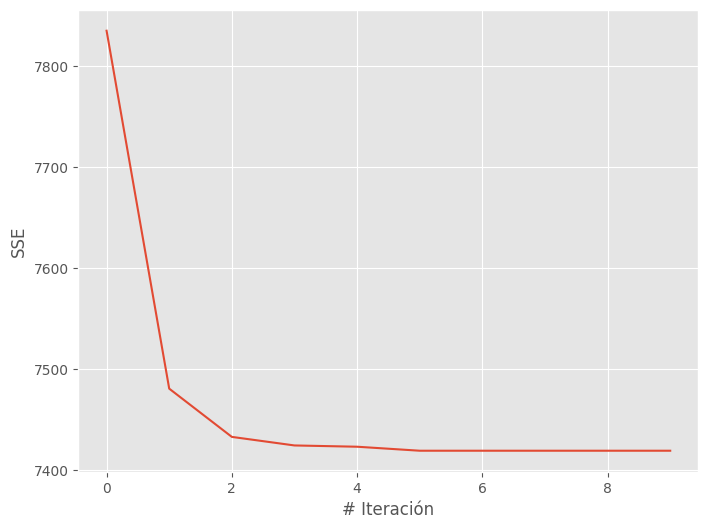

In [22]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.plot(sse)
plt.xlabel('# Iteración')
plt.ylabel('SSE')

## Con SciKitLearn

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=k).fit(X)

/home/vbettachini/bin/jupyter/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


([], [])

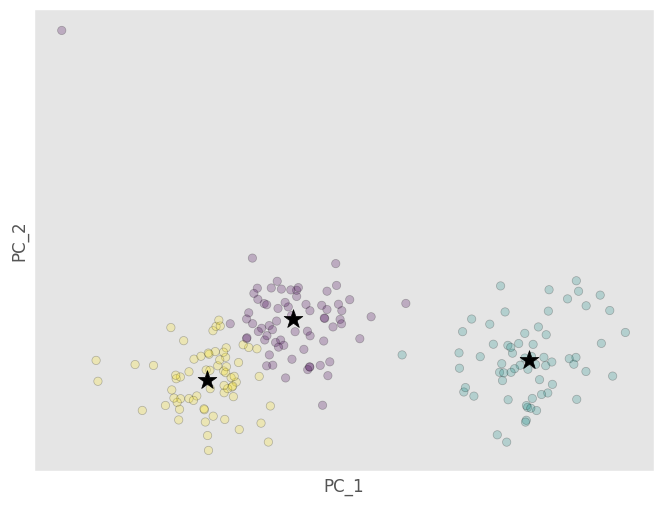

In [25]:
centroides_sklean_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=kmeans.labels_, alpha=.25, edgecolor='k')
plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1],
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())